# 디지털신호처리 (DSP) HW10
#### 이름 : 이연우
#### 학번 : 201810793
#### 학과 : 휴먼지능정보공학과

### - 문제
a) my_imresize function을 만드세요. 반드시 def my_imresize(img, scale) 형태로 만들어야 합니다. 여기서, img는 확대나 축소할 image 이름, scale은 확대 또는 축소비율 (scale=2.9 : 2.9배 크기 확대, scale=0.668 :66.8%로 크기 축소)

b) a)에서 만든 function을 사용하여 실제 영상을 읽고, 확대하고 축소하고, 실제 크기로 display 하세요.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import skimage
from skimage import data

### a) my_imresize function을 만드세요.
#### 반드시 def my_imresize(img, scale) 형태로 만들어야 합니다. 여기서, img는 확대나 축소할 image 이름, scale은 확대 또는 축소비율 (scale=2.9 : 2.9배 크기 확대, scale=0.668 :66.8%로 크기 축소)

In [2]:
def my_imresize(img, scale) :
    (x,y) = img.shape
    inv_scale = 1 / scale
    (ix, iy) = (int(x*scale), int(y*scale))
    int_image = np.zeros((ix, iy), dtype="uint8")

    for i in np.arange(ix-1):
        row = i * inv_scale
        irow = int(row)
        a = row - irow
        for j in np.arange(iy-1):
            col = j * inv_scale
            icol = int(col)
            b = col - icol
            if irow < x - 1 and icol < y -1 :
                int_image[i, j] = (img[irow,icol]*(1-a)*(1-b) + img[irow,icol+1]*a*(1-b) 
                                   + img[irow+1,icol]*(1-a)*b + img[irow+1,icol+1]*a*b).astype("uint8")
 
    return int_image

### b) a)에서 만든 function을 사용하여 실제 영상을 읽고, 확대하고 축소하고, 실제 크기로 display 하세요.
#### scale=2.9 : 2.9배 크기 확대, scale=0.668 :66.8%로 크기 축소

#### - 이미지를 실제 크기로 출력하는 함수 

In [3]:
def display_image_in_actual_size(im): # 이미지 실제 사이즈로 출려

    dpi = mpl.rcParams['figure.dpi']
    #im_data = plt.imread(im_path)
    height, width= im.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im, cmap='gray')

    plt.show()


In [4]:
cam = data.camera()
expand_cam = my_imresize(cam, 2.9)
reduce_cam = my_imresize(cam, 0.668)

#### - 실제 이미지

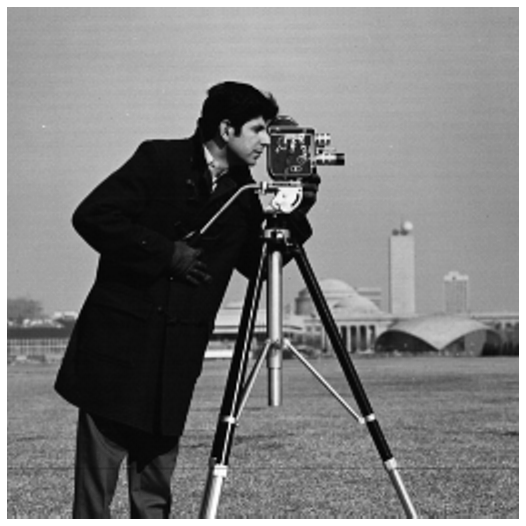

In [5]:
display_image_in_actual_size(cam)

#### - scale=2.9 : 2.9배 크기 확대

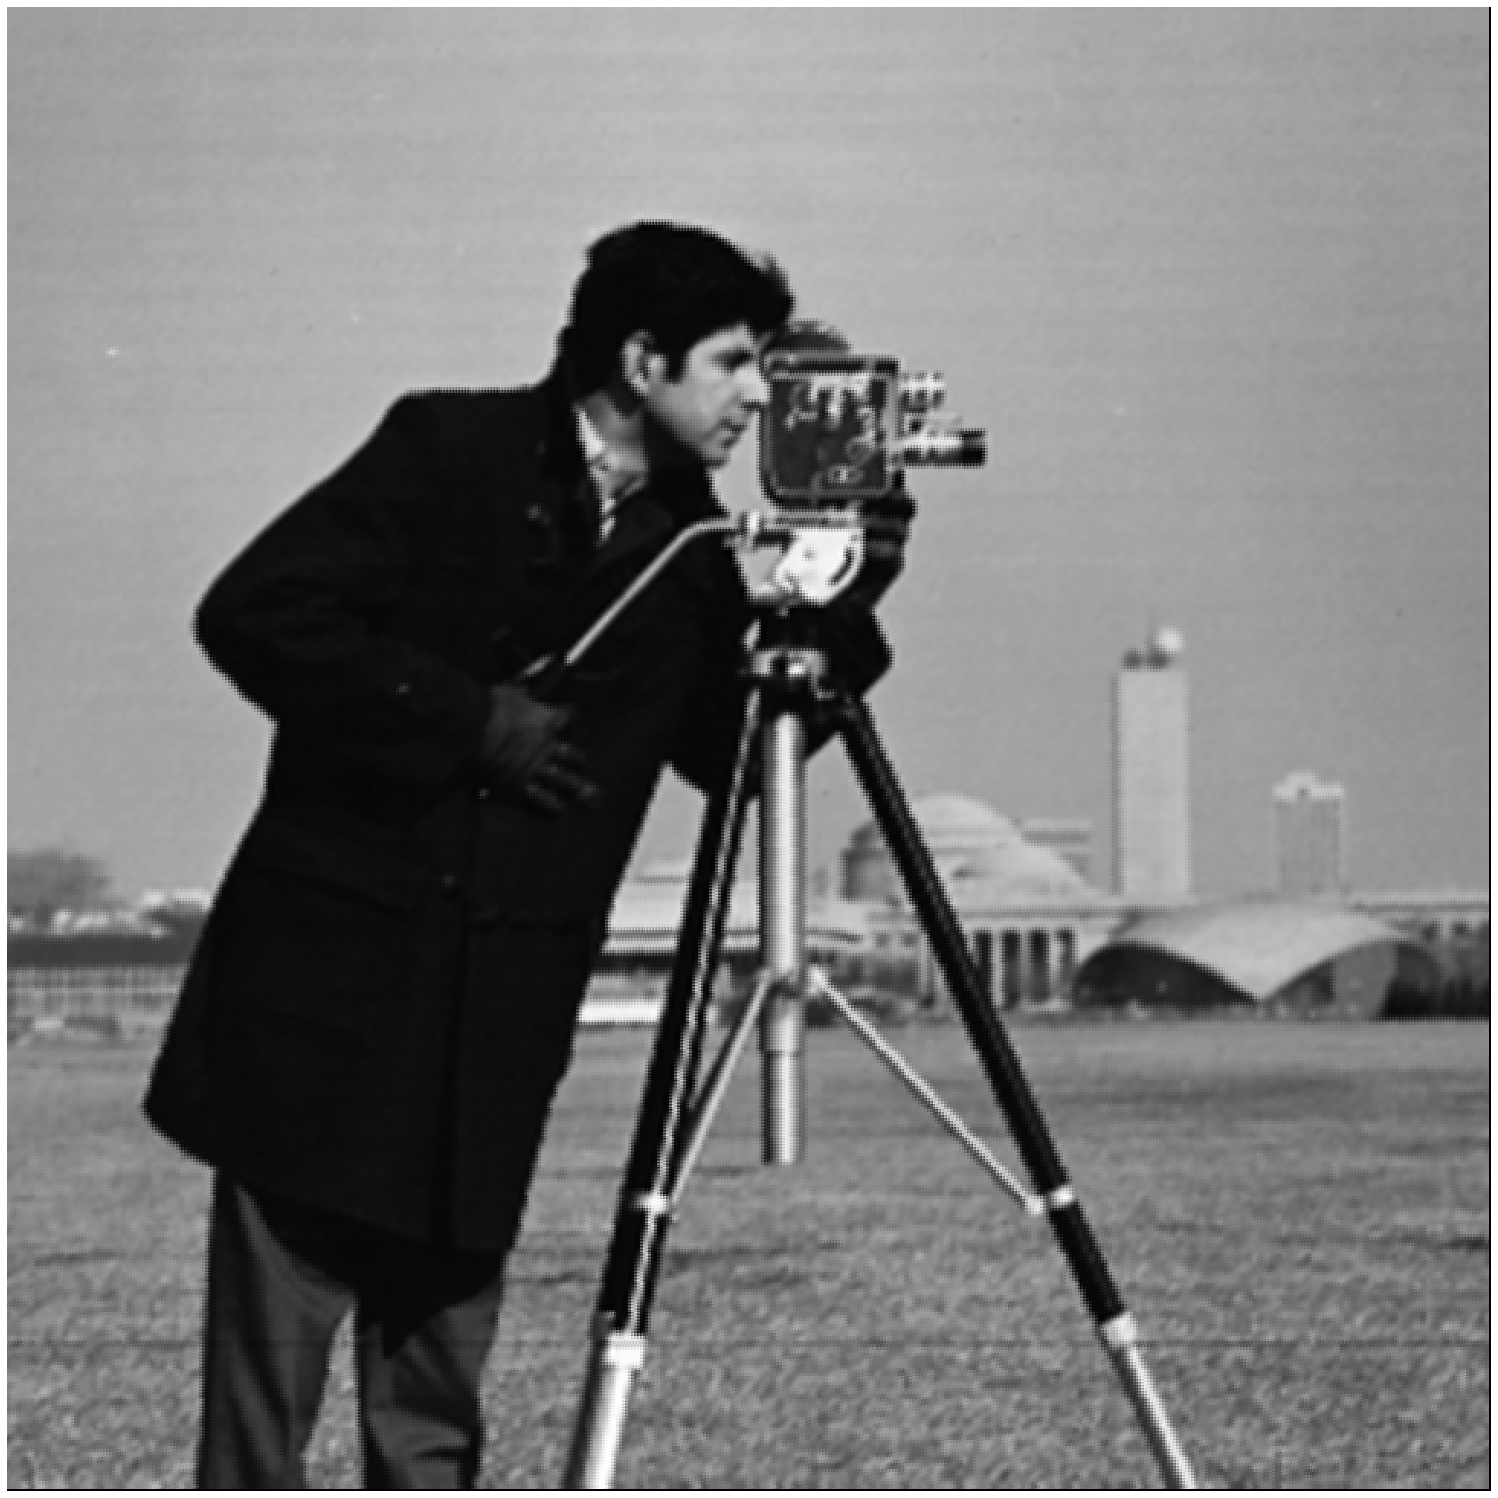

In [6]:
display_image_in_actual_size(expand_cam)

pdf는 창 크기에 맞춰서 이미지 사이즈가 바뀌기 때문에 실제 보다 작게 출력됨

#### - scale=0.668 :66.8%로 크기 축소

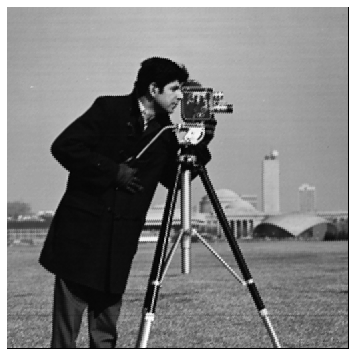

In [7]:
display_image_in_actual_size(reduce_cam)